# Importando las librerias

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# ETL

## Extracción de los datos


- Los dastos estan extraido de los datos abiertos de Covid-19 en México

In [59]:
data = pd.read_csv('../../datasets/datos_abiertos_covid19/200610COVID19MEXICO.csv')

In [60]:
data.head(5)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-06-10,0f69b4,2,3,15,2,7,15,106,1,...,2,2,2,2,1,1,99,México,99,97
1,2020-06-10,1c79cc,2,3,15,2,15,15,106,2,...,2,2,2,2,2,1,99,México,99,2
2,2020-06-10,140aab,2,4,9,2,9,9,7,1,...,2,2,2,2,99,1,99,México,99,97
3,2020-06-10,051c09,2,4,2,2,2,2,4,1,...,2,2,2,2,99,1,99,México,99,97
4,2020-06-10,1c8c37,2,4,9,2,15,15,58,2,...,2,2,2,2,99,1,99,México,99,2


# Transformación de los datos

In [61]:
data.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369362 entries, 0 to 369361
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   FECHA_ACTUALIZACION  369362 non-null  object
 1   ID_REGISTRO          369361 non-null  object
 2   ORIGEN               369362 non-null  int64 
 3   SECTOR               369362 non-null  int64 
 4   ENTIDAD_UM           369362 non-null  int64 
 5   SEXO                 369362 non-null  int64 
 6   ENTIDAD_NAC          369362 non-null  int64 
 7   ENTIDAD_RES          369362 non-null  int64 
 8   MUNICIPIO_RES        369362 non-null  int64 
 9   TIPO_PACIENTE        369362 non-null  int64 
 10  FECHA_INGRESO        369362 non-null  object
 11  FECHA_SINTOMAS       369362 non-null  object
 12  FECHA_DEF            369362 non-null  object
 13  INTUBADO             369362 non-null  int64 
 14  NEUMONIA             369362 non-null  int64 
 15  EDAD                 369362 non-nu

In [63]:
data.FECHA_INGRESO = pd.to_datetime(data.FECHA_INGRESO)
data.FECHA_SINTOMAS = pd.to_datetime(data.FECHA_SINTOMAS)

In [64]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369362 entries, 0 to 369361
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   FECHA_ACTUALIZACION  369362 non-null  object        
 1   ID_REGISTRO          369361 non-null  object        
 2   ORIGEN               369362 non-null  int64         
 3   SECTOR               369362 non-null  int64         
 4   ENTIDAD_UM           369362 non-null  int64         
 5   SEXO                 369362 non-null  int64         
 6   ENTIDAD_NAC          369362 non-null  int64         
 7   ENTIDAD_RES          369362 non-null  int64         
 8   MUNICIPIO_RES        369362 non-null  int64         
 9   TIPO_PACIENTE        369362 non-null  int64         
 10  FECHA_INGRESO        369362 non-null  datetime64[ns]
 11  FECHA_SINTOMAS       369362 non-null  datetime64[ns]
 12  FECHA_DEF            369362 non-null  object        
 13  INTUBADO      

## Variables

- Transformación de algunas variables

In [65]:
# Numero de semana
data['Num_Semana_Ingreso'] = data.FECHA_INGRESO.dt.week

# Mes
data['Mes_Ingreso'] = data.FECHA_INGRESO.dt.month

# Dia
data['Dia_Ingreso'] = data.FECHA_INGRESO.dt.day

# Nombre dia
data['DiaNombre_Ingreso'] = data.FECHA_INGRESO.dt.day_name()

# Obervacion de las nuevas variables creadas.
data[['DiaNombre_Ingreso', 'Dia_Ingreso', 'Mes_Ingreso', 'Num_Semana_Ingreso']]

<ipython-input-65-70908bd323bd>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['Num_Semana_Ingreso'] = data.FECHA_INGRESO.dt.week


,DiaNombre_Ingreso,Dia_Ingreso,Mes_Ingreso,Num_Semana_Ingreso
0,Wednesday,27,5,22
1,Thursday,4,6,23
2,Monday,27,4,18
3,Thursday,30,4,18
4,Tuesday,5,5,19
...,...,...,...,...
369357,Monday,1,6,23
369358,Monday,20,4,17
369359,Wednesday,10,6,24
369360,Wednesday,10,6,24


In [66]:
data.head(5)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,Num_Semana_Ingreso,Mes_Ingreso,Dia_Ingreso,DiaNombre_Ingreso
0,2020-06-10,0f69b4,2,3,15,2,7,15,106,1,...,1,1,99,México,99,97,22,5,27,Wednesday
1,2020-06-10,1c79cc,2,3,15,2,15,15,106,2,...,2,1,99,México,99,2,23,6,4,Thursday
2,2020-06-10,140aab,2,4,9,2,9,9,7,1,...,99,1,99,México,99,97,18,4,27,Monday
3,2020-06-10,051c09,2,4,2,2,2,2,4,1,...,99,1,99,México,99,97,18,4,30,Thursday
4,2020-06-10,1c8c37,2,4,9,2,15,15,58,2,...,99,1,99,México,99,2,19,5,5,Tuesday


In [67]:
# Eliminacion algunas variables
def delvar(df, var):
    del df[var]
    return df

In [68]:
delvar(data,'FECHA_ACTUALIZACION')
delvar(data, 'ID_REGISTRO')
delvar(data, 'ORIGEN')
delvar(data, 'SECTOR')
delvar(data, 'ENTIDAD_UM')
delvar(data, 'ENTIDAD_NAC')
delvar(data, 'ENTIDAD_RES')
delvar(data, 'MUNICIPIO_RES')

,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,...,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,Num_Semana_Ingreso,Mes_Ingreso,Dia_Ingreso,DiaNombre_Ingreso
0,2,1,2020-05-27,2020-05-25,9999-99-99,97,2,53,1,97,...,1,1,99,México,99,97,22,5,27,Wednesday
1,2,2,2020-06-04,2020-05-31,9999-99-99,2,1,59,1,97,...,2,1,99,México,99,2,23,6,4,Thursday
2,2,1,2020-04-27,2020-04-20,9999-99-99,97,2,34,1,97,...,99,1,99,México,99,97,18,4,27,Monday
3,2,1,2020-04-30,2020-04-24,9999-99-99,97,2,45,1,97,...,99,1,99,México,99,97,18,4,30,Thursday
4,2,2,2020-05-05,2020-04-23,9999-99-99,2,1,53,1,97,...,99,1,99,México,99,2,19,5,5,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369357,2,1,2020-06-01,2020-05-27,9999-99-99,97,2,51,2,97,...,1,3,2,Bolivia,99,97,23,6,1,Monday
369358,2,2,2020-04-20,2020-04-19,9999-99-99,2,2,96,1,97,...,99,3,99,México,99,2,17,4,20,Monday
369359,1,1,2020-06-10,2020-06-09,9999-99-99,97,2,46,1,2,...,1,3,99,México,99,97,24,6,10,Wednesday
369360,1,1,2020-06-10,2020-06-05,9999-99-99,97,2,40,1,2,...,1,3,99,México,99,97,24,6,10,Wednesday


In [80]:
# Suposicion 1-Mujer
# 2- Hombre
#data[['SEXO', 'EMBARAZO']][:30]


In [81]:
list_sex = []
for sex in data.SEXO:
    if sex == 1:
        sex = 'Woman'
    else:
        sex = 'Man'
    list_sex.append(sex)
    
data['SEXO_Tipo'] = list_sex

In [82]:
data.head(2)

,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,...,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,Num_Semana_Ingreso,Mes_Ingreso,Dia_Ingreso,DiaNombre_Ingreso,SEXO_Tipo
0,2,1,2020-05-27,2020-05-25,9999-99-99,97,2,53,1,97,...,1,99,México,99,97,22,5,27,Wednesday,Man
1,2,2,2020-06-04,2020-05-31,9999-99-99,2,1,59,1,97,...,1,99,México,99,2,23,6,4,Thursday,Man


In [83]:
data.columns

Index(['SEXO', 'TIPO_PACIENTE', 'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF',
       'INTUBADO', 'NEUMONIA', 'EDAD', 'NACIONALIDAD', 'EMBARAZO',
       'HABLA_LENGUA_INDIG', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
       'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'RESULTADO', 'MIGRANTE',
       'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI', 'Num_Semana_Ingreso',
       'Mes_Ingreso', 'Dia_Ingreso', 'DiaNombre_Ingreso', 'SEXO_Tipo'],
      dtype='object')

In [85]:
delvar(data, 'TIPO_PACIENTE')
delvar(data, 'MIGRANTE')
delvar(data, 'PAIS_NACIONALIDAD')
delvar(data, 'PAIS_ORIGEN')

,SEXO,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,UCI,Num_Semana_Ingreso,Mes_Ingreso,Dia_Ingreso,DiaNombre_Ingreso,SEXO_Tipo
0,2,2020-05-27,2020-05-25,9999-99-99,97,2,53,1,97,2,...,2,2,1,1,97,22,5,27,Wednesday,Man
1,2,2020-06-04,2020-05-31,9999-99-99,2,1,59,1,97,2,...,2,2,2,1,2,23,6,4,Thursday,Man
2,2,2020-04-27,2020-04-20,9999-99-99,97,2,34,1,97,2,...,2,2,99,1,97,18,4,27,Monday,Man
3,2,2020-04-30,2020-04-24,9999-99-99,97,2,45,1,97,2,...,2,2,99,1,97,18,4,30,Thursday,Man
4,2,2020-05-05,2020-04-23,9999-99-99,2,1,53,1,97,2,...,2,2,99,1,2,19,5,5,Tuesday,Man
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369357,2,2020-06-01,2020-05-27,9999-99-99,97,2,51,2,97,99,...,2,2,1,3,97,23,6,1,Monday,Man
369358,2,2020-04-20,2020-04-19,9999-99-99,2,2,96,1,97,2,...,2,1,99,3,2,17,4,20,Monday,Man
369359,1,2020-06-10,2020-06-09,9999-99-99,97,2,46,1,2,2,...,2,2,1,3,97,24,6,10,Wednesday,Woman
369360,1,2020-06-10,2020-06-05,9999-99-99,97,2,40,1,2,2,...,2,2,1,3,97,24,6,10,Wednesday,Woman


In [86]:
data.head(2)

,SEXO,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,UCI,Num_Semana_Ingreso,Mes_Ingreso,Dia_Ingreso,DiaNombre_Ingreso,SEXO_Tipo
0,2,2020-05-27,2020-05-25,9999-99-99,97,2,53,1,97,2,...,2,2,1,1,97,22,5,27,Wednesday,Man
1,2,2020-06-04,2020-05-31,9999-99-99,2,1,59,1,97,2,...,2,2,2,1,2,23,6,4,Thursday,Man


In [89]:
# Creando variables con fecha de sintomas
# Numero de semana
data['Num_Semana_Sintoma'] = data.FECHA_SINTOMAS.dt.week

# Mes
data['Mes_Sintoma'] = data.FECHA_SINTOMAS.dt.month

# Dia
data['Dia_Sintoma'] = data.FECHA_SINTOMAS.dt.day

# Nombre dia
data['DiaNombre_Sintoma'] = data.FECHA_SINTOMAS.dt.day_name()

# Obervacion de las nuevas variables creadas.
data[['DiaNombre_Sintoma', 'Dia_Sintoma', 'Mes_Sintoma', 'Num_Semana_Sintoma']]

<ipython-input-89-372d3e9575de>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['Num_Semana_Sintoma'] = data.FECHA_SINTOMAS.dt.week


,DiaNombre_Sintoma,Dia_Sintoma,Mes_Sintoma,Num_Semana_Sintoma
0,Monday,25,5,22
1,Sunday,31,5,22
2,Monday,20,4,17
3,Friday,24,4,17
4,Thursday,23,4,17
...,...,...,...,...
369357,Wednesday,27,5,22
369358,Sunday,19,4,16
369359,Tuesday,9,6,24
369360,Friday,5,6,23


In [90]:
data.head(2)

,SEXO,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,...,UCI,Num_Semana_Ingreso,Mes_Ingreso,Dia_Ingreso,DiaNombre_Ingreso,SEXO_Tipo,Num_Semana_Sintoma,Mes_Sintoma,Dia_Sintoma,DiaNombre_Sintoma
0,2,2020-05-27,2020-05-25,9999-99-99,97,2,53,1,97,2,...,97,22,5,27,Wednesday,Man,22,5,25,Monday
1,2,2020-06-04,2020-05-31,9999-99-99,2,1,59,1,97,2,...,2,23,6,4,Thursday,Man,22,5,31,Sunday


# Data Vizualisation

En funcion de los datos obtenido. Donde previamente, se realizo una limpieza y transofrmacion de los mismos para asi poder tener unos datos mas completos y asi, el análisis sea los mas puntual posible.

In [108]:
man_1 = []


array([5, 6, 4, 3, 2, 1])

KeyboardInterrupt: 

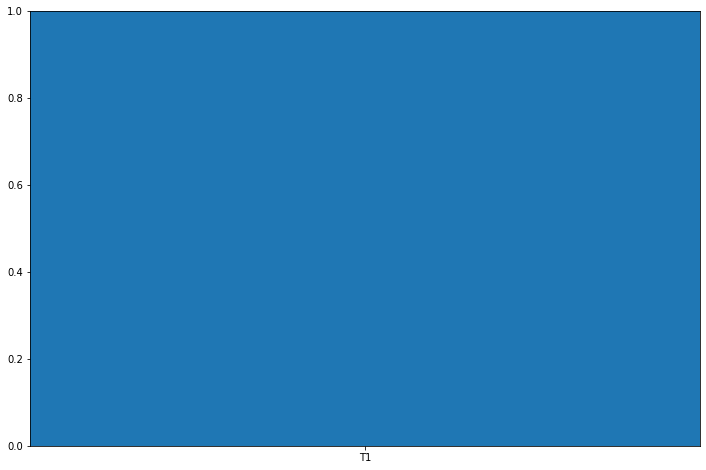

In [107]:
fig, ax = plt.subplots(figsize=(12,8))
ax.bar('T1',age_man, width=0.35, yerr=std_age_woman, label='Man')